# Übung 08: Arbeiten mit Datum
Für die folgenden Aufgaben benötigst du die Datei <font color=orange>ethereum.csv</font>. Importiere sie entsprechend.

In [106]:
import pandas as pd
import numpy as np
from datetime import *

In [107]:
df = pd.read_csv('../../src/ethereum.csv')
df.head()

,timestamp,close,high,volume,open,low
0,2019-06-17 00:19:41,241.770004,241.940002,114107.0,241.100006,241.100006
1,2019-06-17 00:20:42,243.080002,243.690002,309802.0,241.759995,241.679993
2,2019-06-17 00:47:34,243.160004,243.199997,143161.0,243.080002,242.500000
3,2019-06-17 01:07:57,243.440002,243.589996,90154.0,243.210007,243.210007
4,2019-06-17 01:21:35,242.539993,243.669998,30257.0,243.440002,242.539993


## Teilaufgabe 1:
Prüfe ob die Spalte 'timestamp' korrekt als Datentyp **datetime** importiert wurde. Wenn nicht konvertiere sie entsprechend.

In [108]:
# Mit df.info() erhalten wir sofort den Überblick, die Spalte scheint nicht als Datetime vorzuliegen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 6 columns):
timestamp    1325 non-null object
close        1325 non-null float64
high         1325 non-null float64
volume       1325 non-null float64
open         1325 non-null float64
low          1325 non-null float64
dtypes: float64(5), object(1)
memory usage: 62.2+ KB


In [109]:
# Wir konvertieren die Spalte also
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 6 columns):
timestamp    1325 non-null datetime64[ns]
close        1325 non-null float64
high         1325 non-null float64
volume       1325 non-null float64
open         1325 non-null float64
low          1325 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 62.2 KB


## Teilaufgabe 2:
Wir möchten jetzt die Spalte Datum, Stunde und Minute aus dem Timestamp extrahieren und im DataFrame abspeichern.

In [110]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

In [111]:
df.head()

,timestamp,close,high,volume,open,low,date,hour,minute
0,2019-06-17 00:19:41,241.770004,241.940002,114107.0,241.100006,241.100006,2019-06-17,0,19
1,2019-06-17 00:20:42,243.080002,243.690002,309802.0,241.759995,241.679993,2019-06-17,0,20
2,2019-06-17 00:47:34,243.160004,243.199997,143161.0,243.080002,242.500000,2019-06-17,0,47
3,2019-06-17 01:07:57,243.440002,243.589996,90154.0,243.210007,243.210007,2019-06-17,1,7
4,2019-06-17 01:21:35,242.539993,243.669998,30257.0,243.440002,242.539993,2019-06-17,1,21


## Teilaufgabe 3:
Wir möchten jetzt einige Graphen plotten. Bevor wir dies tun können müssen wir allerdings die Spalte timestamp als Index setzen. 


* Plotten Sie den Verlauf des Preises (Close) in einem Linien Diagramm. 
* Ermitteln Sie das Tageshoch und das Tagestief für jeden Tag und plotten Sie die beiden Kurven in ein Diagram. Erstellen sie dazu einen neuen leeren DataFrame ``pd.DataFrame()`` in dem du die Ergebnisse deiner Berechnungen speichern kannst.



In [112]:
# timestamp als Index setzen
df = df.set_index('timestamp')

**Einfacher Plot**

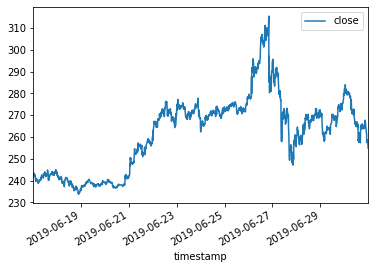

In [113]:
df[['close']].plot()

**High/Low Plot**

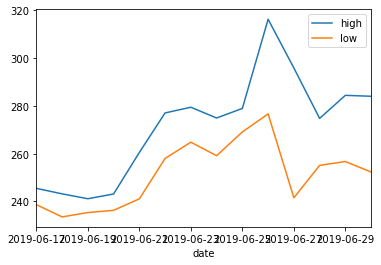

In [114]:
df_high_low = pd.DataFrame()
df_high_low['high'] = df[['date', 'high']].groupby('date').max()['high']
df_high_low['low'] = df[['date', 'low']].groupby('date').min()['low']
df_high_low.plot()

## Teilaufgabe 4:
In der nächsten Aufgaben wollen wir uns damit beschäftigen wie wir Zeitstempel weiterverarbeiten können.


* Die Auflösung des ersten Plots mit 15min ist uns zu genau. Fasse die Werte zu einem Wert alle 12 Stunden zusammen. Plotte anschließend wieder die Werte der Spalte close 
* Für Finanzanalysen ist der gleitende Durchschnitt wichtig. Wir wollen daher in einem neuen DataFrame die Werte der gleitenden Durschnitte mit den folgenden Parameter speichern und anschließend in einem Graphen plotten:

 <font color="blue">
    * 6 Stunden
    * 24 Stunden
    * 3 Tag
 </font>

**12 Stunden Resampling**

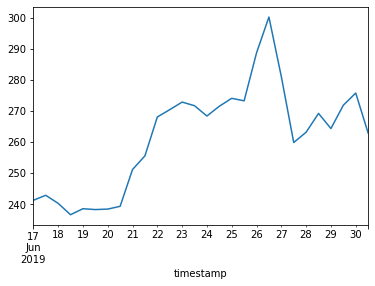

In [115]:
df['close'].resample('12H').mean().plot()

**Rolling mit 6 Stunden, 24 Stunden 3 Tagen**

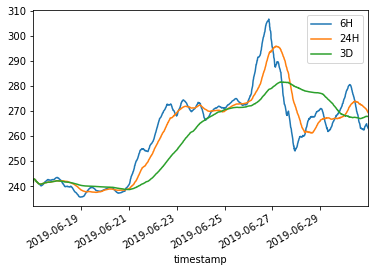

In [116]:
df_rolling = pd.DataFrame()
df_rolling['6H'] = df['close'].rolling(window='6H').mean()
df_rolling['24H'] = df['close'].rolling(window='24H').mean()
df_rolling['3D'] = df['close'].rolling(window='3D').mean()
df_rolling.plot()

## Zusatzaufgabe 1:
Finde eine Möglichkeit dir den ausgeschriebenen Namen eines Tages aus einem Timestamp zu generieren.
Erstelle eine neue Spalte und speichere diesen für jeden Wert in deinem DataFrame.

In [117]:
# Lösung
df['weekday'] = df.index.weekday_name
df.sample(10)

,close,high,volume,open,low,date,hour,minute,weekday
timestamp,,,,,,,,,
2019-06-21 21:25:26,256.880005,257.600006,167102.0,257.600006,256.779999,2019-06-21,21,25,Friday
2019-06-24 19:25:29,270.000000,270.239990,140638.0,269.470001,269.410004,2019-06-24,19,25,Monday
2019-06-21 13:50:27,252.289993,252.449997,252938.0,251.940002,251.339996,2019-06-21,13,50,Friday
2019-06-17 04:18:13,240.320007,240.360001,61217.0,240.149994,239.949997,2019-06-17,4,18,Monday
2019-06-22 23:42:19,269.769989,271.000000,127924.0,270.880005,269.480011,2019-06-22,23,42,Saturday
2019-06-28 20:09:49,269.950012,273.079987,463426.0,273.079987,269.950012,2019-06-28,20,9,Friday
2019-06-27 01:47:59,286.869995,286.869995,509056.0,284.750000,282.320007,2019-06-27,1,47,Thursday
2019-06-18 07:49:44,239.509995,239.649994,238563.0,238.350006,238.199997,2019-06-18,7,49,Tuesday
2019-06-18 08:51:18,241.440002,241.720001,196044.0,241.380005,241.110001,2019-06-18,8,51,Tuesday


In [118]:
# Alternative Lösung
df = df.reset_index()
df['weekday'] = df['timestamp'].dt.weekday_name
df.sample(10)

,timestamp,close,high,volume,open,low,date,hour,minute,weekday
1172,2019-06-29 09:48:36,263.059998,263.089996,513724.0,261.160004,260.429993,2019-06-29,9,48,Saturday
622,2019-06-23 16:03:51,271.540009,273.589996,320177.0,272.470001,270.720001,2019-06-23,16,3,Sunday
24,2019-06-17 06:18:13,239.490005,239.660004,50788.0,239.300003,239.089996,2019-06-17,6,18,Monday
393,2019-06-21 05:00:25,248.949997,248.970001,127015.0,248.309998,248.160004,2019-06-21,5,0,Friday
333,2019-06-20 11:36:48,237.199997,237.250000,103422.0,236.610001,236.610001,2019-06-20,11,36,Thursday
706,2019-06-24 13:07:19,271.109985,272.489990,167937.0,272.339996,271.109985,2019-06-24,13,7,Monday
171,2019-06-18 19:06:28,237.539993,237.589996,150898.0,236.690002,236.600006,2019-06-18,19,6,Tuesday
602,2019-06-23 11:16:36,270.809998,270.980011,115300.0,269.970001,269.809998,2019-06-23,11,16,Sunday
908,2019-06-26 15:51:33,302.480011,303.929993,709392.0,303.450012,300.779999,2019-06-26,15,51,Wednesday
22,2019-06-17 05:44:47,239.130005,239.300003,21862.0,239.250000,239.029999,2019-06-17,5,44,Monday


## Zusatzaufgabe 2:
Beim Erstellen des DataFrames ist ein Fehler unterlaufen. Die timestamps sind alle um 1 Tag verschoben. Ändere den Timestamp durch Addition so, das alle Timestamps um +24H Stunden verschoben werden und speichere diesen in einer neuen Spalte mit dem Namen 'timestamp_new'

In [120]:
df['timestamp_new'] = df['timestamp'] + pd.DateOffset(days=1)
df.head()

,timestamp,close,high,volume,open,low,date,hour,minute,weekday
0,2019-06-19 00:19:41,241.770004,241.940002,114107.0,241.100006,241.100006,2019-06-17,0,19,Monday
1,2019-06-19 00:20:42,243.080002,243.690002,309802.0,241.759995,241.679993,2019-06-17,0,20,Monday
2,2019-06-19 00:47:34,243.160004,243.199997,143161.0,243.080002,242.500000,2019-06-17,0,47,Monday
3,2019-06-19 01:07:57,243.440002,243.589996,90154.0,243.210007,243.210007,2019-06-17,1,7,Monday
4,2019-06-19 01:21:35,242.539993,243.669998,30257.0,243.440002,242.539993,2019-06-17,1,21,Monday
